In [1]:
#ジェンシム(Pythonの自然言語処理ライブラリ)
!pip install gensim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **60. 単語ベクトルの読み込みと表示Permalink**

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

:

In [3]:
#60
import gensim

# Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル
file_path = '/content/drive/My Drive/MN_NLP_Folder/GoogleNews-vectors-negative300.bin.gz'

# Word2Vecモデルをバイナリ形式で読み込む
model = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True)

# ベクトルの表示
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

# **61. 単語の類似度Permalink**

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [4]:
#61
# "United States"と"U.S."のコサイン類似度を計算(similarity＝メゾット)
similarity = model.similarity('United_States', 'U.S.')

# 類似度の表示
print(f"United States と U.S. のコサイン類似度: {similarity}")

United States と U.S. のコサイン類似度: 0.7310774326324463


# **62. 類似度の高い単語10件Permalink**

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [5]:
#62
# "United States"と最も類似している10語を取得
similar_words = model.most_similar('United_States', topn=10)

# 類似語とその類似度を表示
print("United States と類似度が高い10語とその類似度:")
for i, (word, similarity) in enumerate(similar_words, start=1) :
    print(f"{i}. {word}: {similarity}")

United States と類似度が高い10語とその類似度:
1. Unites_States: 0.7877248525619507
2. Untied_States: 0.7541370987892151
3. United_Sates: 0.7400724291801453
4. U.S.: 0.7310774326324463
5. theUnited_States: 0.6404393911361694
6. America: 0.6178410053253174
7. UnitedStates: 0.6167312264442444
8. Europe: 0.6132988929748535
9. countries: 0.6044804453849792
10. Canada: 0.601906955242157


# **63. 加法構成性によるアナロジーPermalink**

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [6]:
#63
# 「Spain」のベクトルから「Madrid」を引き、「Athens」を足したベクトルを計算
result_vector = model['Spain'] - model['Madrid'] + model['Athens']

# 計算したベクトルと最も類似度が高い10語を取得
similar_words = model.most_similar(result_vector, topn=10)

# 類似語とその類似度を順位付きで表示
print("Spain - Madrid + Athens のベクトルと類似度が高い10語とその類似度:")
for i, (word, similarity) in enumerate(similar_words, start=1) :
    print(f"{i}. {word}: {similarity}")

Spain - Madrid + Athens のベクトルと類似度が高い10語とその類似度:
1. Athens: 0.7528455853462219
2. Greece: 0.6685472130775452
3. Aristeidis_Grigoriadis: 0.5495778322219849
4. Ioannis_Drymonakos: 0.5361457467079163
5. Greeks: 0.5351786017417908
6. Ioannis_Christou: 0.5330225825309753
7. Hrysopiyi_Devetzi: 0.5088489055633545
8. Iraklion: 0.5059264302253723
9. Greek: 0.5040615797042847
10. Athens_Greece: 0.5034108757972717


In [7]:
similar_words_ = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
# 類似語とその類似度を順位付きで表示
print("Spain - Madrid + Athens のベクトルと類似度が高い10語とその類似度:")
for i, (word, similarity) in enumerate(similar_words_, start=1) :
    print(f"{i}. {word}: {similarity}")

Spain - Madrid + Athens のベクトルと類似度が高い10語とその類似度:
1. Greece: 0.6898480653762817
2. Aristeidis_Grigoriadis: 0.560684859752655
3. Ioannis_Drymonakos: 0.5552908778190613
4. Greeks: 0.545068621635437
5. Ioannis_Christou: 0.5400862097740173
6. Hrysopiyi_Devetzi: 0.5248445272445679
7. Heraklio: 0.5207759737968445
8. Athens_Greece: 0.516880989074707
9. Lithuania: 0.5166865587234497
10. Iraklion: 0.5146791338920593


In [12]:
valid_path = '/content/drive/My Drive/MN_NLP_Folder/questions-words.txt'

In [14]:
import os

# Google Driveのパスを指定
drive_path = '/content/drive/My Drive/'

# "GoogleNews-vectors-negative300.bin.gz" を検索
file_name = 'questions-words-add.txt'

# ファイルが存在するか確認
for root, dirs, files in os.walk(drive_path):
    if file_name in files:
        print(f"{os.path.join(root, file_name)}")

/content/drive/My Drive/100本ノック/questions-words-add.txt


# **64. アナロジーデータでの実験Permalink**

単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．



In [ ]:
#64
from tqdm import tqdm

# 評価データ
input_file = '/content/drive/My Drive/100本ノック/questions-words.txt'
output_file = '/content/drive/My Drive/100本ノック/questions-words-add.txt'

# tqdm用のtotal数を先に調べておく
total = 0
with open(input_file, 'r', encoding='utf-8') as f:
    for row in f:
        total += 1

# カテゴリごとに処理を行い、出力ファイルに結果を書き込む
with open(input_file, 'r', encoding='utf-8') as f1, open(output_file, 'w', encoding='utf-8') as f2:
    category = ''
    for line in tqdm(f1, total=total):  # tqdmで進行状況を表示
        line = line.split()

        # カテゴリ行（:で始まる行）の場合
        if line[0] == ':':
            category = line[1]
            continue

        # 単語アナロジー計算
        try:
            word, similarity = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(' '.join([category] + line + [word, str(similarity) + '\n']))
        except KeyError:
            # モデルに存在しない単語がある場合はスキップ
            continue

print("処理が完了しました。")


100%|██████████| 19558/19558 [2:23:46<00:00,  2.27it/s]

処理が完了しました。


# **65. アナロジータスクでの正解率Permalink**

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．



In [8]:
#65
output_file = '/content/drive/My Drive/100本ノック/questions-words-add.txt'

sem_cnt = 0 #意味的アナロジーの問題数
sem_cor = 0 #意味的アナロジーの正解数
syn_cnt = 0 #文法的アナロジーの問題数
syn_cor = 0 #文法的アナロジーの正解数

# ファイルを読み込んで処理
with open(output_file, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip().split()  # スペース区切りで分割
        if line[0].startswith(':'):  # カテゴリ行のスキップ
            continue

        # 意味的アナロジーと文法的アナロジーの分類
        if not line[0].startswith('gram'):
            sem_cnt += 1
            if line[4] == line[5]:  # 正解単語と予測単語の一致
                sem_cor += 1
        else:
            syn_cnt += 1
            if line[4] == line[5]:
                syn_cor += 1

# 正解率の出力
print(f'意味的アナロジー正解率: {sem_cor / sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor / syn_cnt:.3f}')

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


In [9]:
!unzip /content/wordsim353.zip

Archive:  /content/wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


# **66. WordSimilarity-353での評価Permalink**

The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [10]:
#66
import csv
from scipy.stats import spearmanr

data_path = '/content/combined.csv'

# データの読み込み
human_scores = []
vector_scores = []
with open(data_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)  # ヘッダーをスキップ
    for row in reader:
        word1, word2, human_score = row[0], row[1], float(row[2])
        try:
            # 単語ベクトル間のコサイン類似度を計算
            similarity = model.similarity(word1, word2)
            human_scores.append(human_score)
            vector_scores.append(similarity)
        except KeyError:
            continue

# スピアマン相関係数の計算
correlation,plvalue = spearmanr(human_scores, vector_scores)

print(f"スピアマン相関係数: {correlation:.3f}")


スピアマン相関係数: 0.700


# **67. k-meansクラスタリングPermalink**

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=**5として実行せよ．**

In [22]:
#67
import numpy as np
from sklearn.cluster import KMeans

# ファイルパス
output_file = '/content/drive/My Drive/100本ノック/questions-words-add.txt'

categories1 = ['capital-common-countries', 'capital-world']
categories2 = ['currency', 'gram6-nationality-adjective']
countries = set()

# ファイルの読み込みと処理
with open(output_file, 'r', encoding='utf-8') as f:
    for row in f:
        line = row.strip().split()

        # カテゴリに応じた処理
        if line[0] in categories1:
            country = line[1]  # 国名は2番目の列
            countries.add(country)
        elif line[0] in categories2:
            country = line[1]  # 国名は2番目の列
            countries.add(country)

# 結果の表示
countries = list(countries)
print(f"抽出した国名の数: {len(countries)}")
print(f"抽出した国名: {countries}")
print("\n")


# 国名の単語ベクトルを取得
countries_vec = []
for country in countries:
  countries_vec.append(model[country])

kmeans = KMeans(n_clusters=5) #クラスタ分類
kmeans.fit(countries_vec) #クラスタリングの実行
# 各クラスタに属する国名を表示
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0] #iクラスタに属するインデックスを取得
    cluster_countries = [countries[index] for index in cluster]#属するクラスタの国名を取得

    print(f"Cluster {i}\n {', '.join(cluster_countries)}")


抽出した国名の数: 171
抽出した国名: ['Dakar', 'Damascus', 'Rome', 'Ljubljana', 'Kigali', 'Islamabad', 'Roseau', 'Korea', 'Athens', 'Manama', 'Harare', 'Paris', 'Nairobi', 'Italy', 'Belgrade', 'Helsinki', 'Antananarivo', 'Canada', 'Skopje', 'Kampala', 'Lima', 'Doha', 'Belarus', 'Tunis', 'Jakarta', 'Austria', 'Bujumbura', 'Malaysia', 'Nouakchott', 'Berlin', 'Asmara', 'Funafuti', 'Cairo', 'India', 'Oslo', 'Brussels', 'Romania', 'Accra', 'Slovakia', 'Nicosia', 'Dhaka', 'Khartoum', 'Beirut', 'Algiers', 'Egypt', 'Tokyo', 'Denmark', 'Vietnam', 'Montevideo', 'Tbilisi', 'Croatia', 'Amman', 'Conakry', 'Baghdad', 'Moldova', 'Beijing', 'Georgetown', 'Caracas', 'Stockholm', 'Lisbon', 'Norway', 'Chisinau', 'Iran', 'Colombia', 'Libreville', 'Muscat', 'Cambodia', 'Lilongwe', 'Baku', 'Kingston', 'Angola', 'Bulgaria', 'Astana', 'Vaduz', 'Canberra', 'Argentina', 'Vienna', 'Lithuania', 'Nigeria', 'Sweden', 'China', 'Zagreb', 'England', 'Bishkek', 'Windhoek', 'Switzerland', 'Hanoi', 'Latvia', 'Armenia', 'Thailand', 'Mon

# **68. Ward法によるクラスタリングPermalink**

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

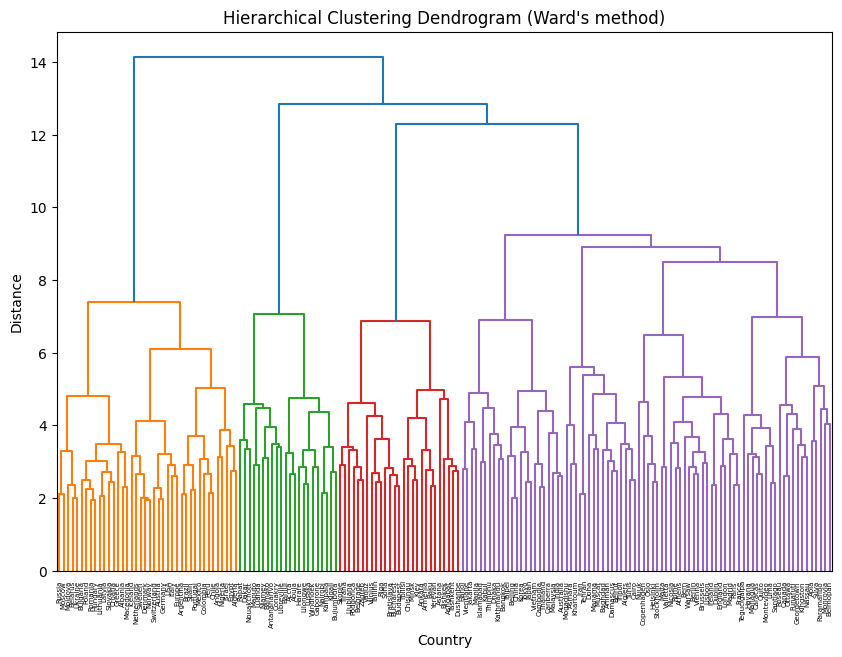

In [24]:
#58
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# 階層型クラスタリング（Ward法）を実行
linked = sch.linkage(countries_vec, method='ward')

plt.figure(figsize=(10, 7))
sch.dendrogram(linked, labels=countries)
plt.title('Hierarchical Clustering Dendrogram (Ward\'s method)')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# **69. t-SNEによる可視化Permalink**

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

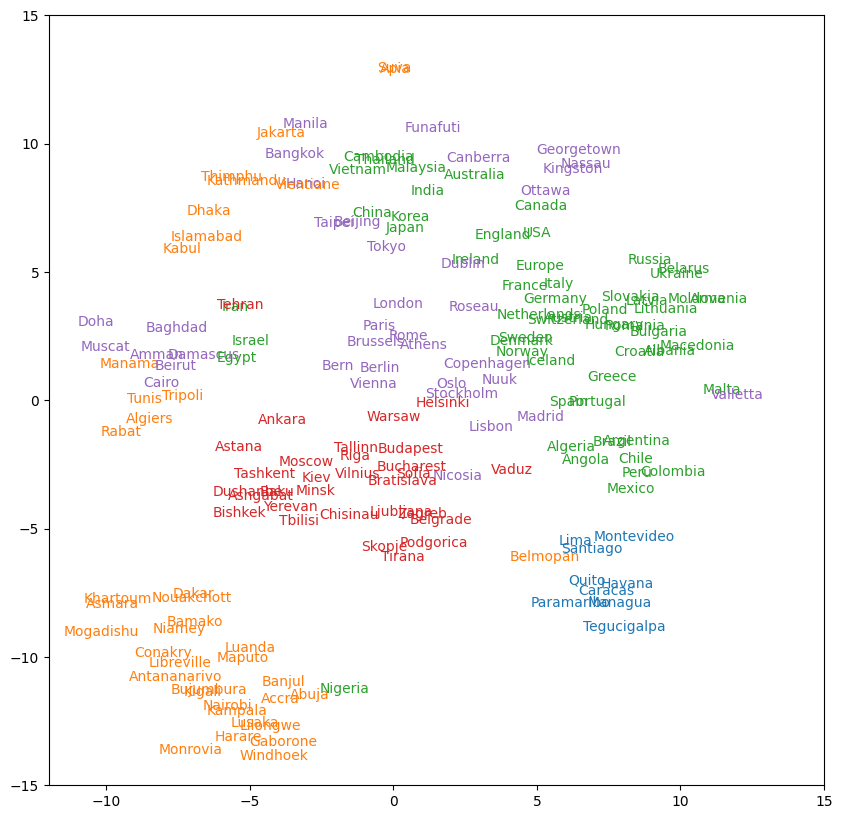

In [27]:
#69
from sklearn.manifold import TSNE　#(ティース二)

# t-SNEで次元を削減
tsne = TSNE(n_components=2, random_state=64)#二次元に次元削減
X_reduced = tsne.fit_transform(np.array(countries_vec)) #変換された２次元座標

plt.figure(figsize=(10, 10))
# 文字の色をクラスタごとに変更して表示
for x, country, color in zip(X_reduced, countries, kmeans.labels_):
    plt.text(x[0], x[1], country, color='C{}'.format(color), fontsize=10)

# 軸の範囲を設定
plt.xlim([-12, 15])
plt.ylim([-15, 15])

# 図の表示
plt.show()